# i. Introduction

**Milestone 2**

Name               : Vicky Eldora Wuisan  

Batch              : 005  

Dataset: Mental Health Dataset.csv, __[DATA SET](https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset/data)__

Link : __[Hugging Face](https://huggingface.co/spaces/vickyeldora/Mental-Health)__

>Problem Statement     :    

In today's world, mental health issues are gaining widespread global attention due to their extensive and often imperceptible impacts. Numerous studies have highlighted that poor mental health can profoundly affect an individual's overall quality of life, encompassing both personal and professional domains.

Discussing the importance of recognizing whether someone needs mental health care becomes crucial because it can help prevent various more serious problems, such as suicide or crime. Suicide and crime resulting from mental health disorders are alarming phenomena __[source](https://www.jawapos.com/kesehatan/01423686/kriminalitas-kerap-dipicu-masalah-kesehatan-mental-ini-kata-psikiater)__. Proper data and analysis can help identify risk factors and warning signs that may arise, enabling timely intervention measures to be taken.

>Objective          :

The primary objective of this project is to develop a classification model aimed at predicting care options based on the provided dataset. The methodology involves constructing classification models utilizing five distinct algorithms: K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Random Forest, AdaBoost, and Decision Tree. Evaluation of these models will be conducted using the recall metric to ascertain the most effective model, subsequently facilitating its deployment for predictive purposes.

# ii. Data Description

data description :

| Column | Description |
| --- | --- |
| `Timestamp` | Time the survey was submitted |
| `Gender` | Respondent gender |
| `Country` | Respondent country |
| `Occupation` | Respondent occupation |
| `self_employed` | Are you self-employed? |
| `family_history` | Do you have a family history of mental illness? |
| `treatment` | Have you sought treatment for a mental health condition? |
| `Days_Indoors` | How long do you typically stay indoors? |
| `Growing_Stress` | Do you easily get stressed? |
| `Changes_Habits` | Do you frequently find yourself unconsciously changing habits? |
| `Mental_Health_History` | Have you ever had any mental health issues previously |
| `Mood_Swings` | Do your moods shift easily? |
| `Work_Interests` | Are you interested in working |
| `Social_Weakness` | Do you experience social weaknesses? |
| `mental_health_interview` | Would you bring up a mental health issue with a potential employer in an interview? |
| `care_options` | Do you need mental health care? |

# iii. Import Libraries

In [1]:
# libraries
import pandas as pd
import numpy as np

# data visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering imports
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import phik

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

# Models imports
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, recall_score

import pickle

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# iv. Data Loading

In [2]:
# import CSV data into the notebook
df_ori = pd.read_csv('Mental Health Dataset.csv')

# duplicate dataset
df = df_ori.copy()

# Display the top 10 rows of the data
df.head(10)

,Timestamp,Age,income,sleep duration,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 14:45,99,5599519,9,Male,United States,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe,No
1,8/27/2014 15:14,35,4064049,7,Male,United States,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe,No
2,8/28/2014 11:40,44,15292832,6,Male,Ireland,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe,No
3,8/28/2014 22:23,60,11105991,24,Male,Netherlands,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe,No
4,8/29/2014 19:32,44,12095969,24,Male,United States,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe,No
5,8/30/2014 13:23,51,13029191,24,Male,United States,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe,No
6,8/30/2014 20:43,34,11629149,24,Male,Germany,Business,Yes,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe,No
7,9/4/2014 17:38,40,10596234,24,Male,United States,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe,No
8,8/27/2014 14:45,88,11505525,24,Male,United States,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,No,Maybe,Maybe,No
9,8/27/2014 15:14,88,14758610,24,Male,United States,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,No,Maybe,Maybe,No


In [3]:
# Display the description/info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Age                      292364 non-null  int64 
 2   income                   292364 non-null  int64 
 3   sleep duration           292364 non-null  int64 
 4   Gender                   292364 non-null  object
 5   Country                  292364 non-null  object
 6   Occupation               292364 non-null  object
 7   self_employed            286604 non-null  object
 8   family_history           292364 non-null  object
 9   treatment                292364 non-null  object
 10  Days_Indoors             292364 non-null  object
 11  Growing_Stress           292364 non-null  object
 12  Changes_Habits           292364 non-null  object
 13  Mental_Health_History    292364 non-null  object
 14  Mood_Swings         

In [4]:
# Display the number of unique values
df.nunique()

Timestamp                     580
Age                            79
income                     286088
sleep duration                 30
Gender                          2
Country                        35
Occupation                      5
self_employed                   2
family_history                  2
treatment                       2
Days_Indoors                    5
Growing_Stress                  3
Changes_Habits                  3
Mental_Health_History           3
Mood_Swings                     3
Coping_Struggles                2
Work_Interest                   3
Social_Weakness                 3
mental_health_interview         3
care_options                    3
dtype: int64

In [5]:
# Display all column names
df.columns

Index(['Timestamp', 'Age', 'income', 'sleep duration', 'Gender', 'Country',
       'Occupation', 'self_employed', 'family_history', 'treatment',
       'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')

In [6]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [7]:
# Check for duplicate data
df.duplicated().sum()

0

In [8]:
# Check for missing values
df.isnull().sum()

Timestamp                     0
Age                           0
income                        0
sleep duration                0
Gender                        0
Country                       0
Occupation                    0
self_employed              5760
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

Missing values will be handled during feature engineering.

In [9]:
# We are not going to use the Timestamp column in our analysis
df.drop(columns = "Timestamp", inplace = True)

In [10]:
# Display the unique values from the 'care_options' column
df['care_options'].unique()

array(['No', 'Not sure', 'Yes'], dtype=object)

In [11]:
# Remove rows with value "Not sure" from the 'care_options' column as I only want to predict yes or no
df = df.loc[df['care_options'] != 'Not sure']

# Display the unique values from the 'care_options' column after removing the value 'Not sure'
df['care_options'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
# Display the description after dropping columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214598 entries, 0 to 292363
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      214598 non-null  int64 
 1   income                   214598 non-null  int64 
 2   sleep duration           214598 non-null  int64 
 3   Gender                   214598 non-null  object
 4   Country                  214598 non-null  object
 5   Occupation               214598 non-null  object
 6   self_employed            210442 non-null  object
 7   family_history           214598 non-null  object
 8   treatment                214598 non-null  object
 9   Days_Indoors             214598 non-null  object
 10  Growing_Stress           214598 non-null  object
 11  Changes_Habits           214598 non-null  object
 12  Mental_Health_History    214598 non-null  object
 13  Mood_Swings              214598 non-null  object
 14  Coping_Struggles         

Here's a brief summary of the data:

- RangeIndex: The range of indices for the rows in the dataset.
- Total columns: The total number of columns in the dataset.
- Column names: Names of the columns in the dataset.
- Non-zero value count per column: The count of non-zero values in each column.
- Data types: The data types of the columns.

The data above already matches its respective data types.

In [13]:
# Display the bottom 10 rows to check if the data types are correct
df.tail(10)

,Age,income,sleep duration,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
292354,33,10892604,11,Female,United States,Corporate,No,No,No,1-14 days,No,No,Yes,High,Yes,Yes,Yes,Yes,Yes
292355,41,64156128,13,Male,New Zealand,Others,No,Yes,Yes,31-60 days,Yes,Maybe,Yes,High,Yes,Maybe,Yes,Yes,Yes
292356,24,22661699,10,Male,United Kingdom,Others,No,Yes,Yes,31-60 days,Yes,Maybe,Yes,High,Yes,Maybe,Yes,Yes,Yes
292357,37,66033245,12,Male,United States,Others,No,No,Yes,31-60 days,Yes,Maybe,Yes,High,Yes,Maybe,Yes,Yes,Yes
292358,55,22441302,2,Male,Australia,Others,No,No,Yes,31-60 days,Yes,Maybe,Yes,High,Yes,Maybe,Yes,Yes,Yes
292359,32,86123450,2,Male,United States,Others,No,No,Yes,31-60 days,Yes,Maybe,Yes,High,Yes,Maybe,Yes,Yes,Yes
292360,22,34636018,12,Male,Moldova,Others,No,No,Yes,31-60 days,Yes,Maybe,Yes,High,Yes,Maybe,Yes,Yes,Yes
292361,49,79206231,7,Male,Germany,Others,Yes,No,No,31-60 days,Yes,Maybe,Yes,High,Yes,Maybe,Yes,Yes,Yes
292362,52,52292854,1,Male,Germany,Others,No,No,No,31-60 days,Yes,Maybe,Yes,High,Yes,Maybe,Yes,Yes,Yes
292363,48,26952077,7,Female,United States,Student,No,No,No,Go out Every day,Maybe,Maybe,Yes,High,Yes,No,Yes,Yes,Yes


# v. Exploratory Data Analysis (EDA)

In [14]:
# Display the top 3 rows
df.head(3)

,Age,income,sleep duration,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,99,5599519,9,Male,United States,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe,No
1,35,4064049,7,Male,United States,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe,No
2,44,15292832,6,Male,Ireland,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe,No


## 1. Displays the distribution of columns with just 6 unique values or less.

,Count,Proportion
Gender,,
Male,"179,010",83.4%
Female,"35,588",16.6%


,Count,Proportion
Occupation,,
Housewife,"48,723",22.7%
Student,"45,297",21.1%
Corporate,"45,083",21.0%
Others,"38,723",18.0%
Business,"36,772",17.1%


,Count,Proportion
self_employed,,
No,"187,640",89.2%
Yes,"22,802",10.8%


,Count,Proportion
family_history,,
No,"124,906",58.2%
Yes,"89,692",41.8%


,Count,Proportion
treatment,,
Yes,"116,998",54.5%
No,"97,600",45.5%


,Count,Proportion
Days_Indoors,,
1-14 days,"46,739",21.8%
31-60 days,"44,559",20.8%
Go out Every day,"42,805",19.9%
More than 2 months,"41,018",19.1%
15-30 days,"39,477",18.4%


,Count,Proportion
Growing_Stress,,
Maybe,"73,543",34.3%
Yes,"72,938",34.0%
No,"68,117",31.7%


,Count,Proportion
Changes_Habits,,
Yes,"80,429",37.5%
Maybe,"69,855",32.6%
No,"64,314",30.0%


,Count,Proportion
Mental_Health_History,,
No,"76,445",35.6%
Maybe,"69,872",32.6%
Yes,"68,281",31.8%


,Count,Proportion
Mood_Swings,,
Medium,"74,232",34.6%
Low,"73,314",34.2%
High,"67,052",31.2%


,Count,Proportion
Coping_Struggles,,
No,"113,495",52.9%
Yes,"101,103",47.1%


,Count,Proportion
Work_Interest,,
No,"77,724",36.2%
Maybe,"74,314",34.6%
Yes,"62,560",29.2%


,Count,Proportion
Social_Weakness,,
Maybe,"75,937",35.4%
No,"71,429",33.3%
Yes,"67,232",31.3%


,Count,Proportion
mental_health_interview,,
No,"171,302",79.8%
Maybe,"36,622",17.1%
Yes,"6,674",3.1%


,Count,Proportion
care_options,,
No,"118,886",55.4%
Yes,"95,712",44.6%


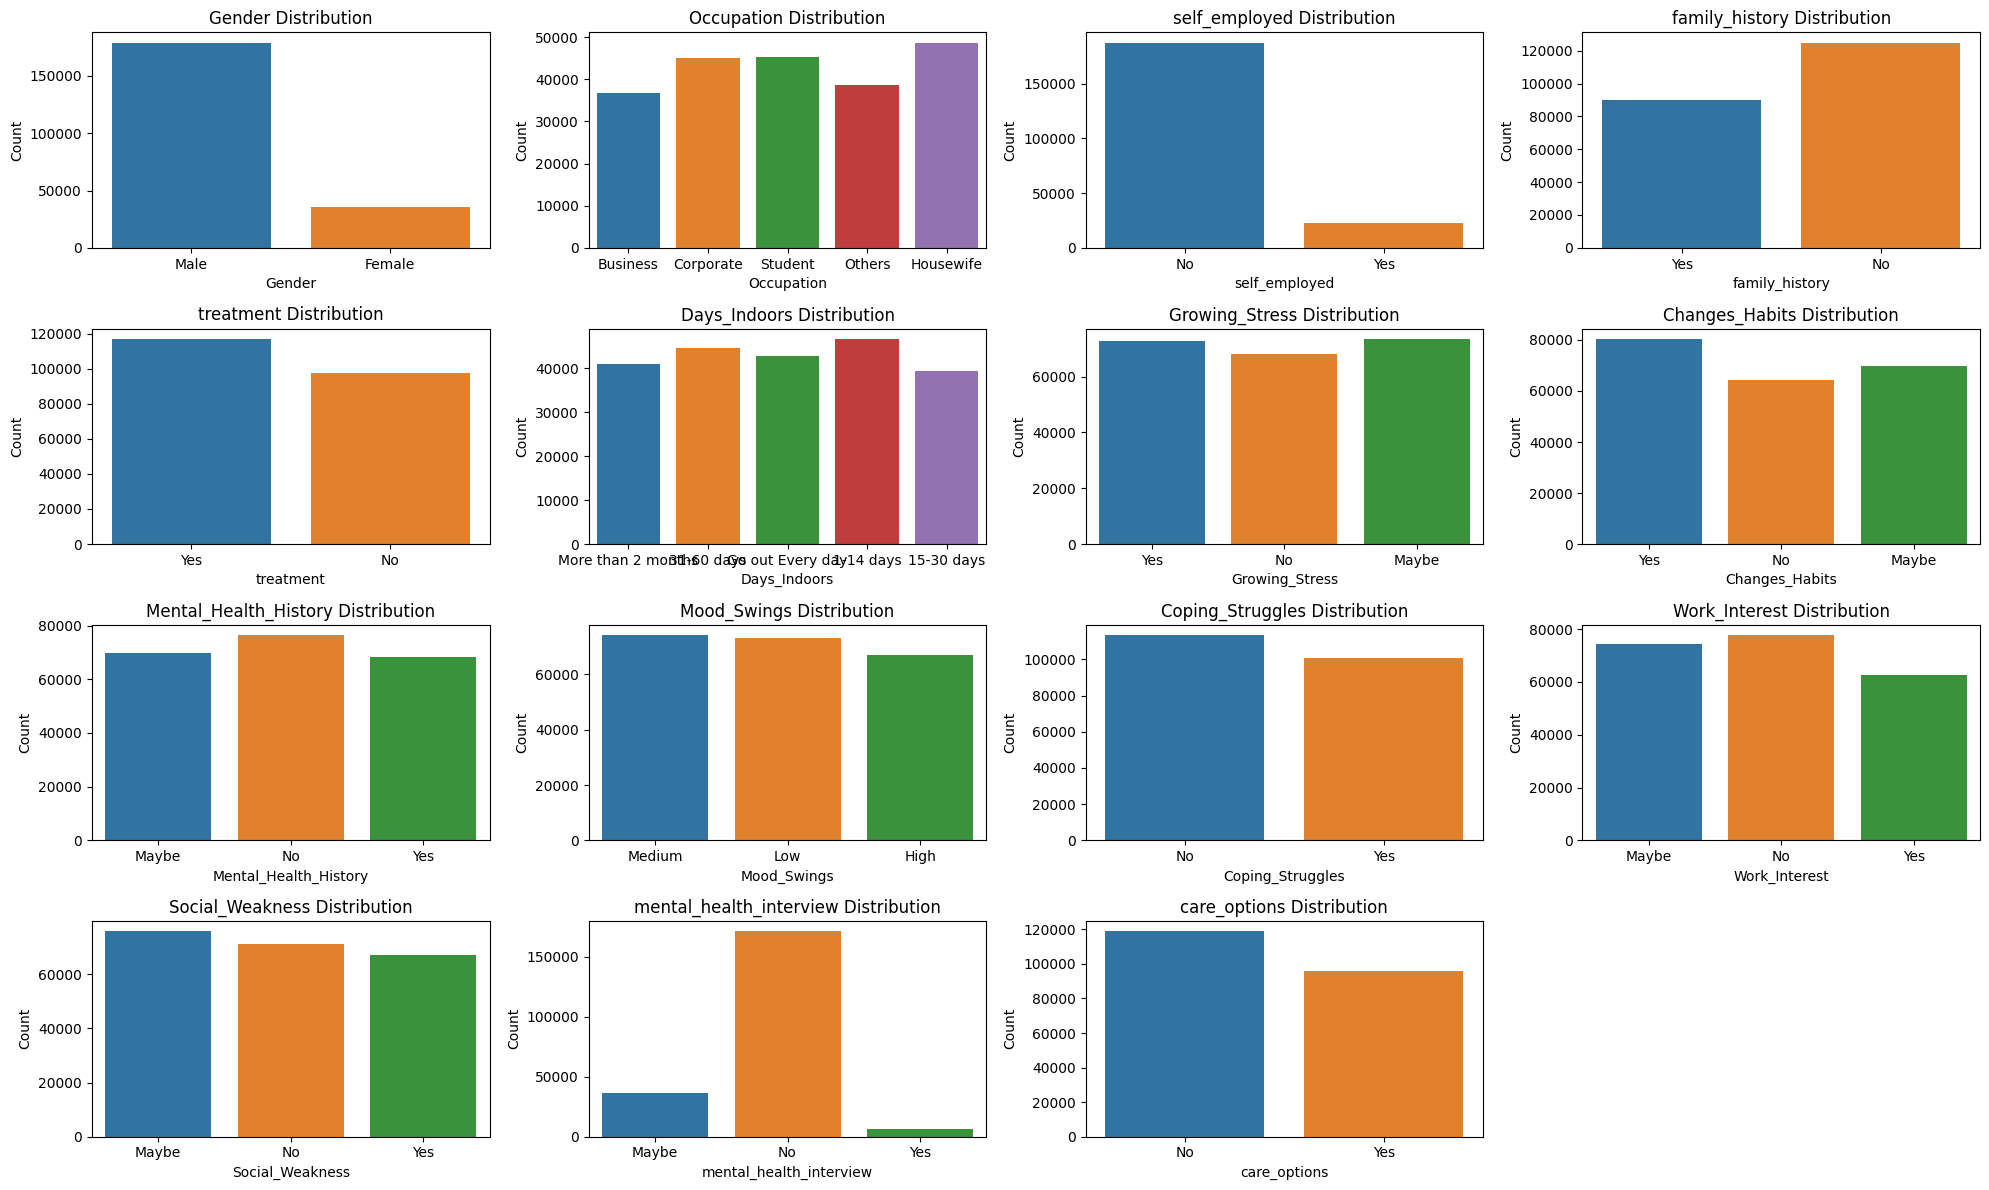

In [15]:
def plot_categorical(df, category, ax, x_rotation=45):
    """
    Plots a count plot and displays a DataFrame with counts and percentages for each category.

    Args:
        df (DataFrame): The DataFrame containing the data.
        category (str): The column name for the categorical variable to plot.
        ax (matplotlib.axes.Axes): The Axes object to draw the plot on.
        x_rotation (int, optional): The number of degrees to rotate the x-axis labels. Defaults to 45.
    """
    # Create count plot with dynamic title
    sns.countplot(data=df, x=category, ax=ax)
    ax.set_ylabel("Count")
    ax.set_title(f"{category} Distribution")

    # Calculate counts and percentages
    category_counts = df[category].value_counts()
    category_percentages = df[category].value_counts(normalize=True)

    # Combine counts and percentages into a DataFrame
    stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
    stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
    stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

    # Display DataFrame
    display(stats_df)

    return stats_df

# Determine columns with less than 6 unique values
cat_col = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() < 6]

# Determine the layout of subplots
cols_per_row = 4
rows = (len(cat_col) + cols_per_row - 1) // cols_per_row  # Compute the necessary number of rows

fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(20, rows * 3))  # Adjust figure size as necessary
axes = axes.flatten()

# Plot each qualifying categorical column
for i, column in enumerate(cat_col):
    plot_categorical(df, column, axes[i])

# Hide unused subplots if there are any remaining
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

We can summarize from the graphs and tables as follows:

- For the "gender" column: There are more males (83.4%) than females (16.6%), which could be due to various factors such as societal norms, gender biases, or differences in response rates to the survey.
- For the "occupation" column: The highest percentage is for housewives at 22.7%, followed by students at 21.1%. Corporate and other occupations are nearly tied at around 21.1% and 18% respectively, while business occupation accounts for 17.1%. The high percentage of housewives may be because they are more likely to be available to participate in surveys compared to individuals in full-time employment.
- For the "self-employed" column: The majority is "No" (89.2%), with "Yes" accounting for only 10.8%. This could be because self-employment often requires a higher level of risk tolerance and entrepreneurial spirit, which may not be prevalent among respondents.
- For the "family history" column: "No" is predominant at 58.2%, while "Yes" accounts for 41.8%. The lower percentage of individuals with a family history of mental health issues could be due to underreporting or lack of awareness of family history among respondents.
- For the "treatment" column: "Yes" prevails at 54.5%, while "No" stands at 45.5%. The higher percentage of individuals seeking treatment could indicate an increasing awareness and acceptance of mental health issues, as well as improved access to mental health services.
- For the "days indoors" column: The percentages are quite similar across different ranges, indicating that respondents' indoor activities are evenly distributed across various time periods.
- For the "growing stress" column: "Yes," "Maybe," and "No" have similar percentages in the 30s range, suggesting that stress levels are distributed relatively evenly among respondents.
- For the "change habits" column: "Yes," "Maybe," and "No" have similar percentages in the 30s range, indicating that respondents' tendencies to change habits are consistent across different categories.
- For the "mental health history" column: "Yes," "Maybe," and "No" have similar percentages in the 30s range, suggesting that respondents' awareness or acknowledgment of their mental health history is evenly distributed.
- For the "mood swings" column: "Low," "Medium," and "High" have similar percentages in the 30s range, indicating that respondents' experiences of mood swings are distributed relatively evenly across different intensity levels.
- For the "coping struggles" column: "Yes" is more prevalent than "No," with "Yes" at 52.9% and "No" at 47.1%. This could indicate a significant portion of respondents experiencing coping struggles, possibly due to various stressors or mental health challenges.
- For the "work interest" column: "Yes," "Maybe," and "No" have similar percentages in the 30s range, suggesting that respondents' interest in work is consistent across different categories.
- For the "social weaknesses" column: "Yes," "Maybe," and "No" have similar percentages in the 30s range, indicating that respondents' experiences of social weaknesses are distributed relatively evenly across different categories.
- For the "mental health interview" column: The majority is "No" at 79.8%, followed by "Maybe" at 17.1%, and "Yes" at 3.1%. The lower percentage of individuals undergoing mental health interviews could be due to various factors such as stigma, lack of awareness, or limited access to mental health services.
- For the "care options" column: "No" accounts for 55.4%, while "Yes" accounts for 44.6%. The lower percentage of individuals opting for care options could be due to barriers such as cost, stigma, or lack of awareness of available resources.

## 2. Displaying the top 10 countries based on Respondent Country.

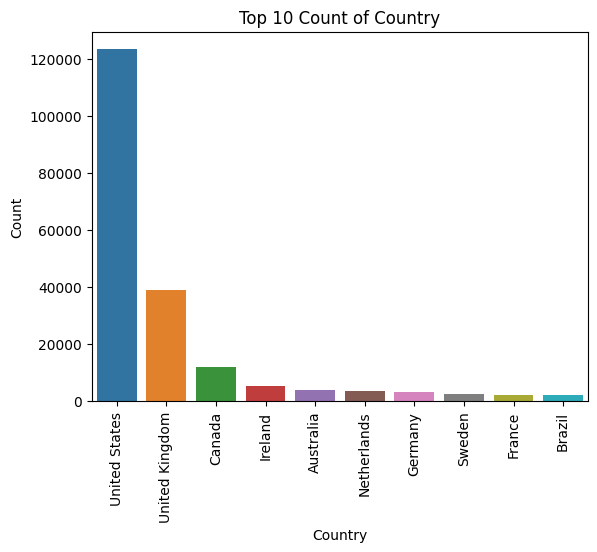

In [16]:
# Create bar_df
bar_df = df['Country'].value_counts().nlargest(10).reset_index()
bar_df.columns = ['Country', 'Count']

# Plot the bar plot
sns.barplot(data=bar_df, x="Country", y="Count")
plt.title("Top 10 Count of Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

The most frequent country is the United States, followed by the United Kingdom, Canada, Ireland, Australia, Netherlands, Germany, Sweden, France, and Brazil. This could be attributed to a higher number of respondents distributing the survey questions in the United States.

## 3. Displaying histograms of numerical columns to visualize the data distribution.

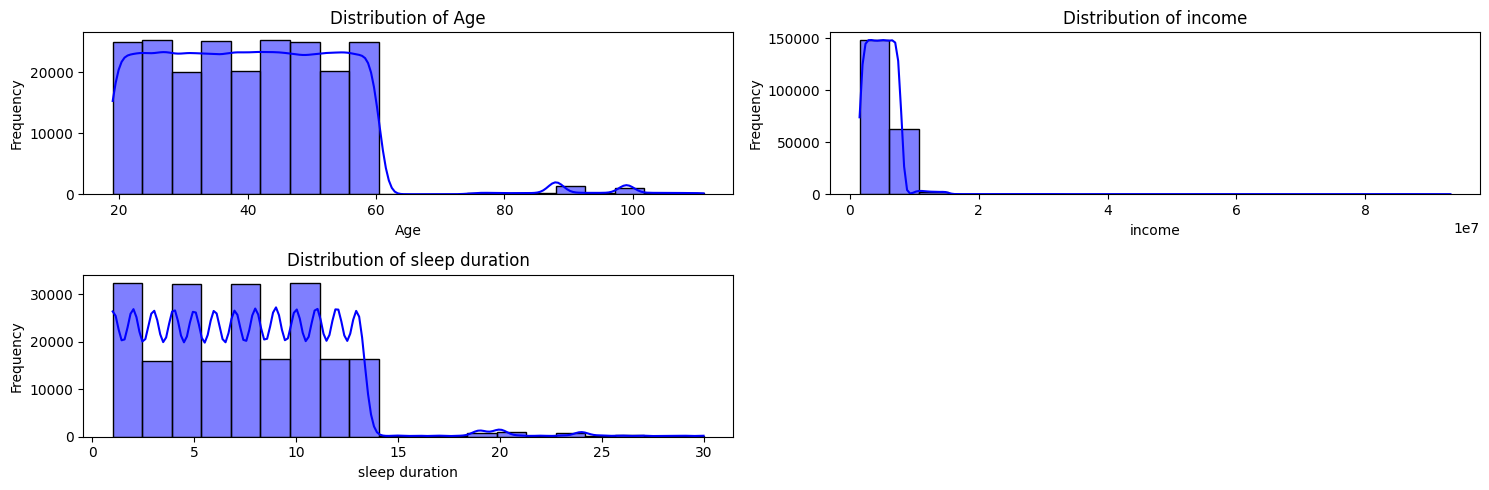

In [17]:
# Select columns and write labels
num_col = df.select_dtypes(include=np.number).columns.tolist()
labels = ['Age', 'income', 'sleep duration']

# Set up the plot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column for plotting its distribution using histplot
for i, (column, label) in enumerate(zip(num_col, labels)):
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20, color='blue')
    axes[i].set_xlabel(column)  
    axes[i].set_ylabel('Frequency') 
    axes[i].set_title(f'Distribution of {label}') 

# Turn off the last axis
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

- The age ranges from 20 to 60 years.
- The income varies from Rp 1,500,000 to Rp 8,000,000.
- The sleep duration ranges from 3 to 13 hours.
- There are few outliers in all columns.

## 4. Displaying occupations based on gender.

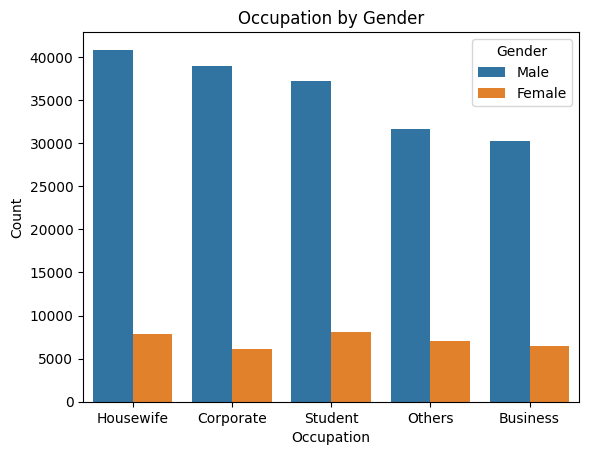

,Gender,Occupation,Count
5,Male,Housewife,40851
6,Male,Corporate,39015
7,Male,Student,37179
8,Male,Others,31671
9,Male,Business,30294
0,Female,Student,8118
1,Female,Housewife,7872
2,Female,Others,7052
3,Female,Business,6478
4,Female,Corporate,6068


In [18]:
# Group data by Gender then filter by Occupation and count occurrences
gender_data = (df.groupby("Gender")["Occupation"].value_counts().reset_index(name = "Count").sort_values(by = "Count", ascending = False))

sns.barplot(data = gender_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Occupation by Gender")
plt.show()

gender_data

The most common occupation is housewife, followed by corporate, student, others, and then business. Additionally, male respondents outnumber females in all occupations, likely due to a higher percentage of male respondents.

## 5. Displaying the most common occupation, which is housewife, by gender for clarity.

From the visualizations above, it is evident that the most common occupation is housewife, and the most prevalent gender is male. Now, let's delve deeper to see whether there are more female or male housewives.

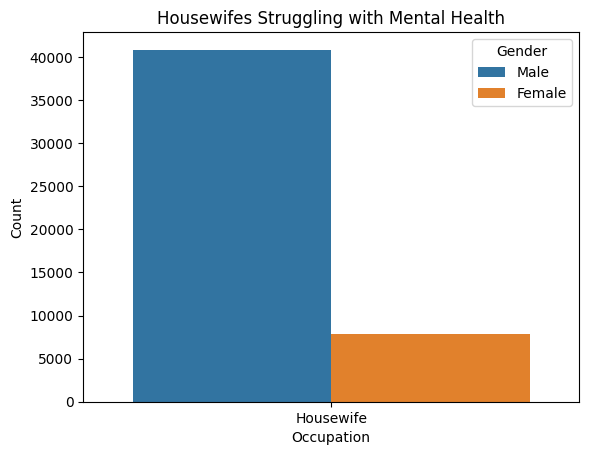

,Gender,Occupation,Count,Percentage
5,Male,Housewife,40851,83.8
1,Female,Housewife,7872,16.2


In [19]:
# Filter the gender data to include only entries where the occupation is "Housewife"
Housewife_data = gender_data[gender_data["Occupation"] == "Housewife"]

sns.barplot(data = Housewife_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Housewifes Struggling with Mental Health")
plt.show()

# Get the total count
total_Housewife_count = Housewife_data["Count"].sum() 

# Calculate percentages based on gender counts
Housewife_data["Percentage"] = (
    Housewife_data["Gender"]
    .apply(
        lambda gender: round((Housewife_data.loc[Housewife_data["Gender"] == gender, "Count"].iloc[0] / total_Housewife_count) * 100, 1)
    )
)

Housewife_data

The observation that more males 83.8% are identified as housewives than females 16.2% could be due to various factors such as:
1. **Changing Gender Roles**: Societal norms and gender roles are evolving, and there may be a growing acceptance of males taking on traditional female roles such as being a housewife.
2. **Small Sample Size**: The number of respondents identifying as housewives could be small, leading to fluctuations and anomalies in the data.
3. **Cultural or Societal Factors**: Cultural or societal factors in certain regions or communities may influence individuals' choices of occupation and how they identify themselves.

## 6. Displaying housewives only from the United States.

From the visualization above, we also know that the most prevalent country is the United States. Therefore, I would like to see how many housewives there are in the United States.

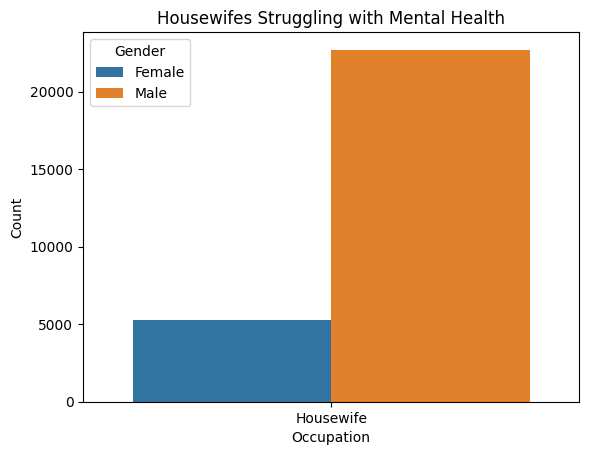

,Gender,Occupation,Count,Percentage
0,Female,Housewife,5280,18.9
1,Male,Housewife,22695,81.1


In [20]:
# Filter the DataFrame to include only United States Housewifes and count occurrences by gender
us_Housewife_data = (
    df
    .loc[(df["Country"] == "United States") & (df["Occupation"] == "Housewife")]
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Count")
)

sns.barplot(data = us_Housewife_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Housewifes Struggling with Mental Health")
plt.show()

# Get the total count
total_us_Housewife_count = us_Housewife_data["Count"].sum() 

# Calculate percentages based on gender counts
us_Housewife_data["Percentage"] = (
    us_Housewife_data["Gender"]
    .apply(
        lambda gender: round((us_Housewife_data.loc[us_Housewife_data["Gender"] == gender, "Count"].iloc[0] / total_us_Housewife_count) * 100, 1)
    )
)

us_Housewife_data

In [21]:
print(f"Out of {total_Housewife_count:,} Housewifes around the world struggling with mental health, {total_us_Housewife_count:,} are US Housewifes.")

Out of 48,723 Housewifes around the world struggling with mental health, 27,975 are US Housewifes.


This significant number of housewives in the United States may be attributed to various factors such as:
1. **Cultural Norms**: The United States may have cultural norms or societal expectations that lead to a higher proportion of individuals identifying as housewives compared to other countries.
2. **Economic Factors**: Economic conditions and opportunities in the United States may influence their decision to stay at home and assume the role of a housewife.

## 7. Displaying how many housewives need mental health care or not.

Given the number of housewives in the United States, I am curious to see how many of them require mental health care.

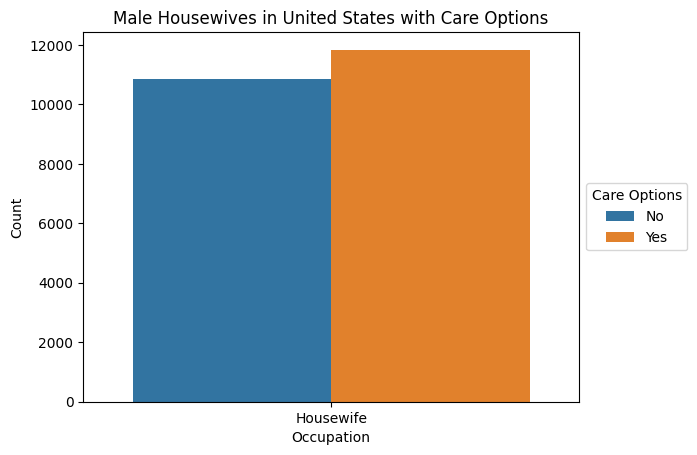

,Occupation,care_options,Count,Percentage
0,Housewife,No,10858,47.8
1,Housewife,Yes,11837,52.2


In [22]:
# Filter the DataFrame to include only United States Male Housewives
us_male_housewife_data = (
    df
    .loc[(df["Country"] == "United States") & (df["Occupation"] == "Housewife") & (df["Gender"] == "Male")]
    .groupby(["Occupation", "care_options"])["Gender"]
    .count()
    .reset_index(name="Count")
)

# Plot
sns.barplot(data=us_male_housewife_data, x="Occupation", y="Count", hue="care_options")
plt.legend(title="Care Options", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Male Housewives in United States with Care Options")
plt.show()

# Get the total count
total_us_male_housewife_count = us_male_housewife_data["Count"].sum()

# Calculate percentages based on care options counts
us_male_housewife_data["Percentage"] = (
    us_male_housewife_data["care_options"]
    .apply(
        lambda care: round((us_male_housewife_data.loc[us_male_housewife_data["care_options"] == care, "Count"].iloc[0] / total_us_male_housewife_count) * 100, 1)
    )
)

us_male_housewife_data

From the data, the difference between the number of housewives needing mental health care and those who do not is slight, with 52.2% needing it and 47.8% not needing it. It's evident that a significant portion requires mental health care.

The nearly equal distribution between housewives needing and not needing mental health care in United States suggests a prevalent need for mental health support within this demographic. This could be influenced by various factors such as societal pressures, domestic responsibilities, and access to mental health resources.

# vi. Feature Engineering

After exploring the data, I will proceed with data preparation for building the model.

## Split dataset

### Split between X (Features/Variables) and y (Target/Label)

In [23]:
# Splitting between X (variables) and y (target)

# The "care_options" column is dropped because it is the target variable and saved into the variable X
X = df.drop(['care_options'], axis=1)

# Saving the table with only the "care_options" column into the variable y
y = df.care_options

# Displaying the X table
X.head()

,Age,income,sleep duration,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
0,99,5599519,9,Male,United States,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe
1,35,4064049,7,Male,United States,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe
2,44,15292832,6,Male,Ireland,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe
3,60,11105991,24,Male,Netherlands,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe
4,44,12095969,24,Male,United States,Business,No,Yes,Yes,More than 2 months,Yes,Yes,Maybe,Medium,No,Maybe,Maybe,Maybe


### Split X_train, X_test, y_test, y_train

In [24]:
# splitting between Train and Test using train 'train_test_split()'ArithmeticError

# Splitting the data into training (75%) and testing (25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=35)

# Displaying the number of rows and columns
print('X Train Size :' , X_train.shape)
print('X Test Size :' , X_test.shape)
print('y Train Size :' , y_train.shape)
print('y Test Size :' , y_test.shape)

X Train Size : (160948, 18)
X Test Size : (53650, 18)
y Train Size : (160948,)
y Test Size : (53650,)


## Missing value handling

In [25]:
# check missing value in X_train
X_train.isnull().sum()

Age                           0
income                        0
sleep duration                0
Gender                        0
Country                       0
Occupation                    0
self_employed              3098
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
dtype: int64

In [26]:
# check missing value in X_test
X_test.isnull().sum()

Age                           0
income                        0
sleep duration                0
Gender                        0
Country                       0
Occupation                    0
self_employed              1058
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
dtype: int64

In [27]:
# check missing value in y_train and y_test
y_train_miss = y_train.isnull().sum()
y_test_miss = y_test.isnull().sum()

print(f'missing value y_train: {y_train_miss}')
print(f'missing value y_test: {y_test_miss}')

missing value y_train: 0
missing value y_test: 0


The missing values in the self_employed column are of the "missing at random" (MAR) type. This implies that these missing entries aren't directly tied to the respondents' self-employment status, but could be influenced by other factors in the dataset. For instance, some individuals might opt not to share their self-employment status due to personal reasons like privacy concerns or feeling unsure about how to define their work situation. Consequently, the absence of this information seems more random than intentional.

In [28]:
# Removing missing values in the target column in y_train and X_train based on index
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Removing missing values in the target column in y_test and X_test based on index
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

# Checking for missing values in y_test after dropna
print(f'Missing values in y_train: {y_train.isnull().sum()}')
print(f'Missing values in y_test: {y_test.isnull().sum()}')

Missing values in y_train: 0
Missing values in y_test: 0


In [29]:
# Check for missing values in X_train after drop
X_train.isnull().sum()

Age                        0
income                     0
sleep duration             0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
dtype: int64

In [30]:
# Check for missing values in X_test after drop
X_test.isnull().sum()

Age                        0
income                     0
sleep duration             0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
dtype: int64

In [31]:
# Display the number of rows and columns after missing value handling
print('X Train Size :' , X_train.shape)
print('X Test Size :' , X_test.shape)
print('y Train Size :' , y_train.shape)
print('y Test Size :' , y_test.shape)

X Train Size : (157850, 18)
X Test Size : (52592, 18)
y Train Size : (157850,)
y Test Size : (52592,)


## Handling outliers

After handling missing values, I will proceed to handle outliers in the data.

In [32]:
# Displaying column names
X_train.columns

Index(['Age', 'income', 'sleep duration', 'Gender', 'Country', 'Occupation',
       'self_employed', 'family_history', 'treatment', 'Days_Indoors',
       'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
       'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview'],
      dtype='object')

In [33]:
# Displaying columns containing only integer and float values
num_col = df.select_dtypes(include=np.number).columns.tolist()

print('Numerical columns:', num_col)

Numerical columns: ['Age', 'income', 'sleep duration']


Handling outliers will only be performed on numerical columns, specifically the columns `Age`, `Income`, and `Sleep Duration`.

In [34]:
# Data categorization
normal =[]
skew = []
extreme_skew = []

# Condition for checking skewness of the data
for i in num_col:
    skewness = X_train[i].skew()
    if -0.5 < skewness < 0.5:
        normal.append(i)
    elif -1 <= skewness <= -0.5 or 0.5 <= skewness <= 1:
        skew.append(i)
    elif skewness < -1 or skewness > 1:
        extreme_skew.append(i)

print('Normal:', normal)
print('Skewed:', skew)
print('Extremely Skewed:', extreme_skew)

Normal: []
Skewed: ['Age', 'sleep duration']
Extremely Skewed: ['income']


Skewed columns: ['Age', 'income']  
Columns with extreme skew: ['sleep duration']

### Checking the percentage of outliers before handling them

In [35]:
# Function to find upper and lower boundaries for skewly distributed variables
def find_skew_boundaries(X_train, variable):
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)

    lower_boundary = X_train[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = X_train[variable].quantile(0.75) + (IQR * 1.5)
    return upper_boundary, lower_boundary

# Function to find upper and lower boundaries for extremely distributed variables
def find_extreme_boundaries(X_train, variable):
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)

    lower_boundary = X_train[variable].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[variable].quantile(0.75) + (IQR * 3)
    return upper_boundary, lower_boundary

# Variabel skew yang ingin dihitung batasannya
skew_variables = ['Age', 'income']
# Variabel extreme yang ingin dihitung batasannya
extreme_variables = ['sleep duration']

# Calculate boundaries for skew variables in the dataset
skew_boundaries = {}
for variable in skew_variables:
    upper_boundary, lower_boundary = find_skew_boundaries(X_train, variable)
    skew_boundaries[variable] = (upper_boundary, lower_boundary)
    
# Calculate boundaries for extreme variables in the dataset
extreme_boundaries = {}
for variable in extreme_variables:
    upper_boundary, lower_boundary = find_extreme_boundaries(X_train, variable)
    extreme_boundaries[variable] = (upper_boundary, lower_boundary)


# Print boundaries for each variable
for variable in skew_variables:
    print('Variable: {}'.format(variable))
    print('Upper boundary: {:.2f}'.format(skew_boundaries[variable][0]))
    print('Lower boundary: {:.2f}'.format(skew_boundaries[variable][1]))
    print('')

# Print boundaries for each variable
for variable in extreme_variables:
    print('Variable: {}'.format(variable))
    print('Upper boundary: {:.2f}'.format(extreme_boundaries[variable][0]))
    print('Lower boundary: {:.2f}'.format(extreme_boundaries[variable][1]))
    print('')

# Flag outliers and calculate percentage of outliers for each variable
outliers_any = pd.Series(False, index=X_train.index)  # Initialize a Series to track outliers across all variables
for variable in skew_variables:
    upper_boundary, lower_boundary = skew_boundaries[variable]
    outliers = (X_train[variable] > upper_boundary) | (X_train[variable] < lower_boundary)
    outliers_any = outliers_any | outliers  # Combine outliers across variables
    percentage_outliers = outliers.mean() * 100
    print('Percentage of outliers in {}: {:.2f}%'.format(variable, percentage_outliers))
    print('')

# Flag outliers and calculate percentage of outliers for each variable
outliers_any = pd.Series(False, index=X_train.index)  # Initialize a Series to track outliers across all variables
for variable in extreme_variables:
    upper_boundary, lower_boundary = extreme_boundaries[variable]
    outliers = (X_train[variable] > upper_boundary) | (X_train[variable] < lower_boundary)
    outliers_any = outliers_any | outliers  # Combine outliers across variables
    percentage_outliers = outliers.mean() * 100
    print('Percentage of outliers in {}: {:.2f}%'.format(variable, percentage_outliers))
    print('')

Variable: Age
Upper boundary: 81.50
Lower boundary: -2.50

Variable: income
Upper boundary: 11466475.88
Lower boundary: -1837843.12

Variable: sleep duration
Upper boundary: 28.00
Lower boundary: -14.00

Percentage of outliers in Age: 1.26%

Percentage of outliers in income: 1.60%

Percentage of outliers in sleep duration: 0.12%



Performing trimming because the outliers are less than 5%, thus having a minor impact if trimmed.

In [36]:
# Trim the dataset by removing outliers
X_train_cap = X_train[~outliers_any]
y_train = y_train.loc[X_train_cap.index]

### Checking the percentage of outliers after handling them

In [37]:
for variable in skew_variables:
    upper_boundary, lower_boundary = skew_boundaries[variable]
    outliers = (X_train_cap[variable] > upper_boundary) | (X_train_cap[variable] < lower_boundary)
    outliers_any = outliers  # Combine outliers across variables
    percentage_outliers = outliers.mean() * 100
    print('Percentage of outliers after trimming in {}: {:.2f}%'.format(variable, percentage_outliers))
    print('')
for variable in extreme_variables:
    upper_boundary, lower_boundary = extreme_boundaries[variable]
    outliers = (X_train_cap[variable] > upper_boundary) | (X_train_cap[variable] < lower_boundary)
    outliers_any = outliers  # Combine outliers across variables
    percentage_outliers = outliers.mean() * 100
    print('Percentage of outliers after trimming in {}: {:.2f}%'.format(variable, percentage_outliers))
    print('')

print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_cap.shape)

Percentage of outliers after trimming in Age: 1.26%

Percentage of outliers after trimming in income: 1.60%

Percentage of outliers after trimming in sleep duration: 0.00%

Size dataset - Before trimming :  (157850, 18)
Size dataset - After trimming  :  (157657, 18)


outliers have been handled so the outlier % is now 0.

### Create a graph box plot to show before and after outliers handling

In [38]:
# Function to create histogram and boxplot.
def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()


Age - Before Trimming


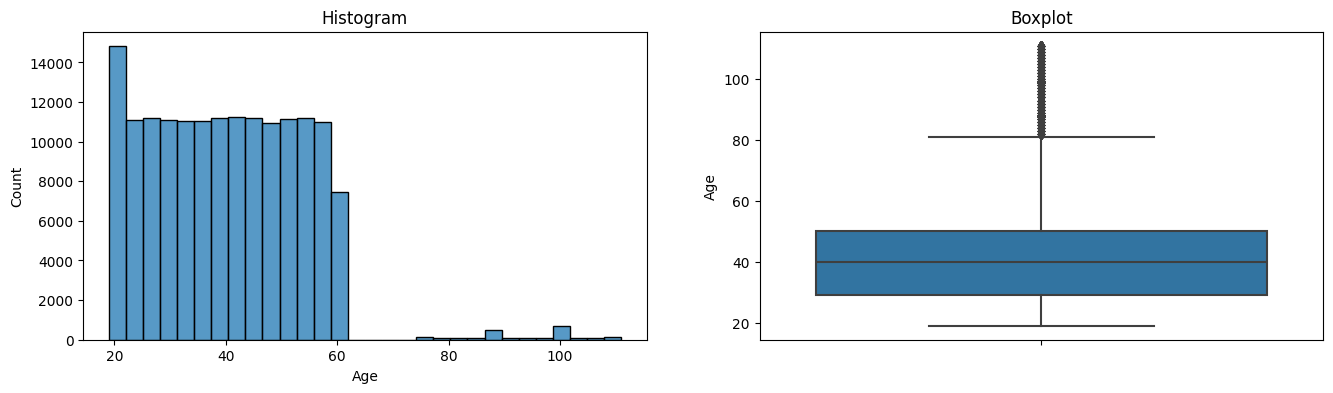


Age - After Trimming


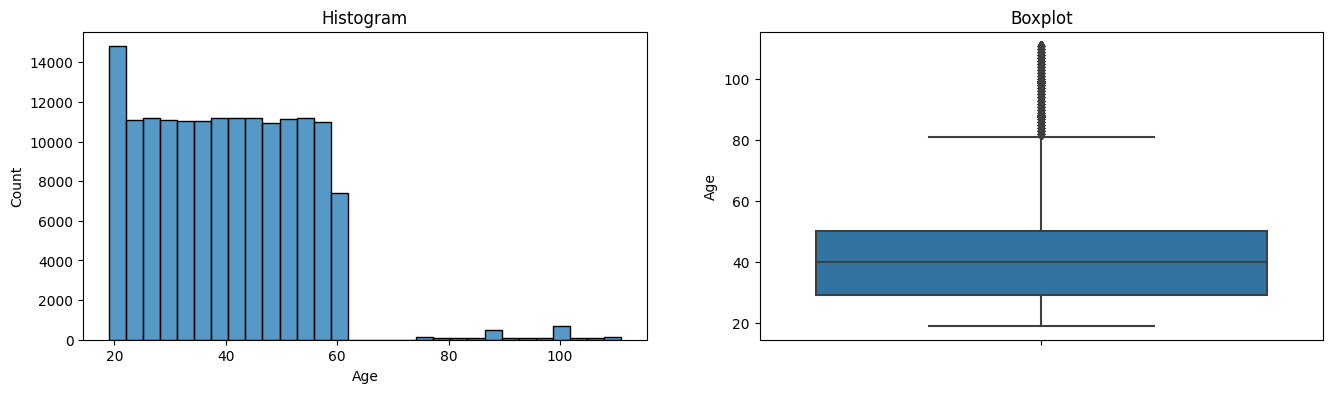

In [39]:
print('\nAge - Before Trimming')
diagnostic_plots(X_train, 'Age')

print('\nAge - After Trimming')
diagnostic_plots(X_train_cap, 'Age')


income - Before Trimming


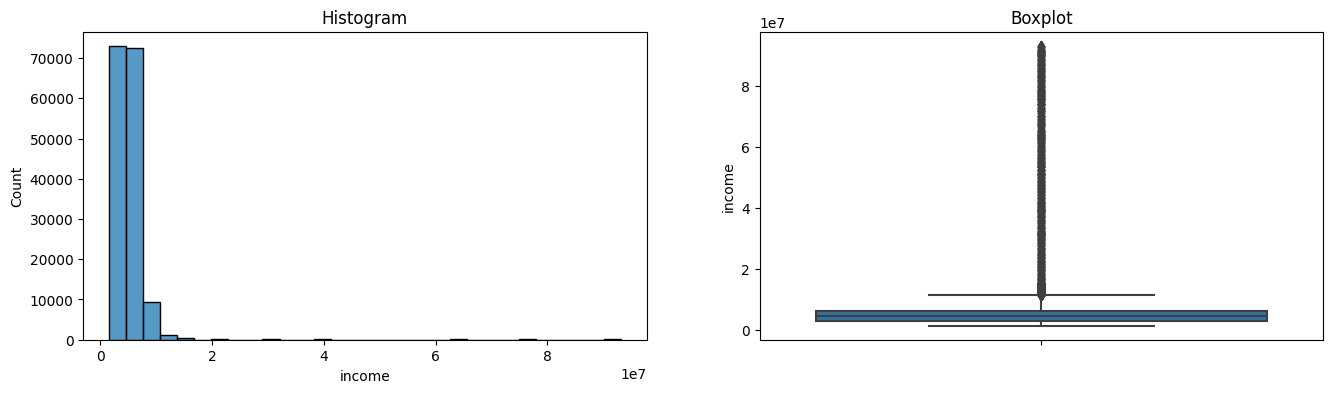


income - After Trimming


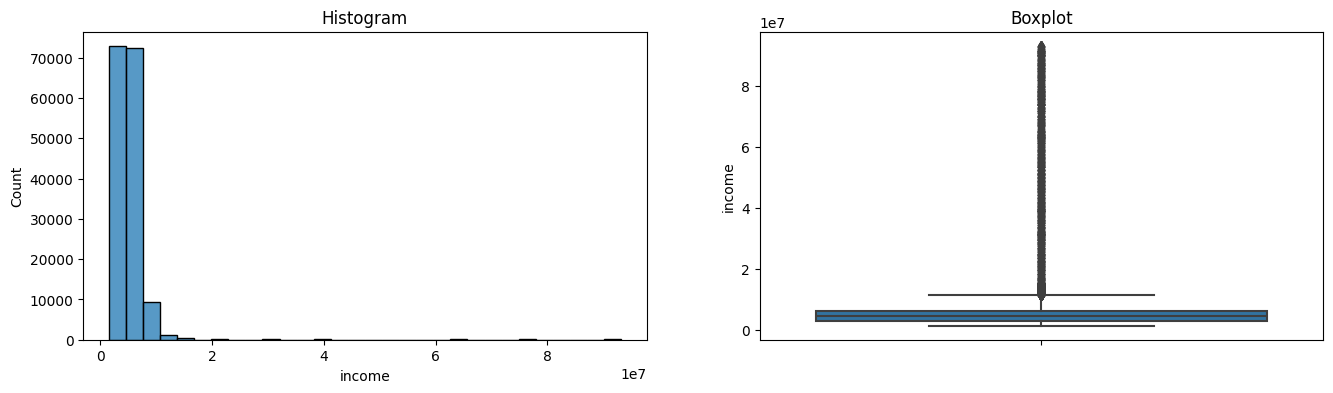

In [40]:
print('\nincome - Before Trimming')
diagnostic_plots(X_train, 'income')

print('\nincome - After Trimming')
diagnostic_plots(X_train_cap, 'income')


sleep duration - Before Trimming


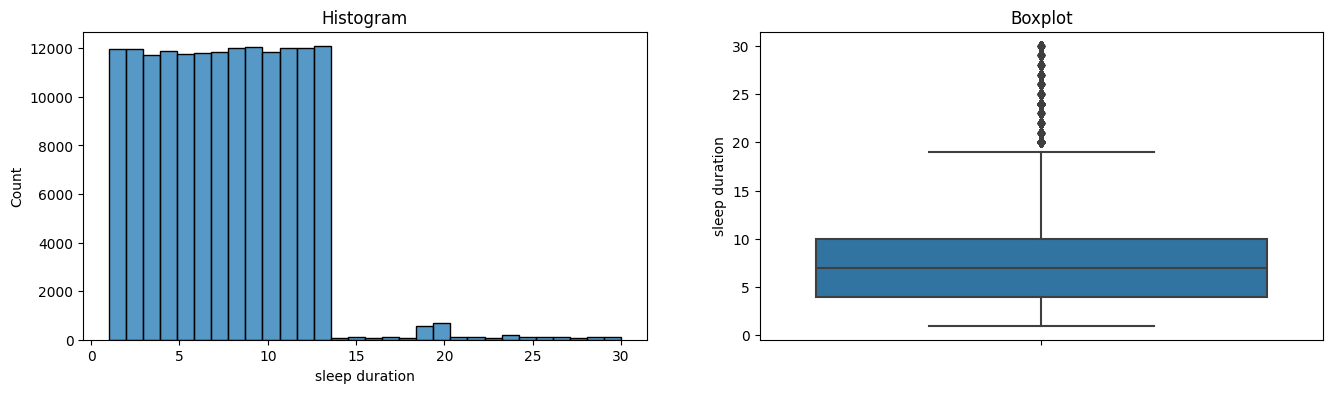


sleep duration - After Trimming


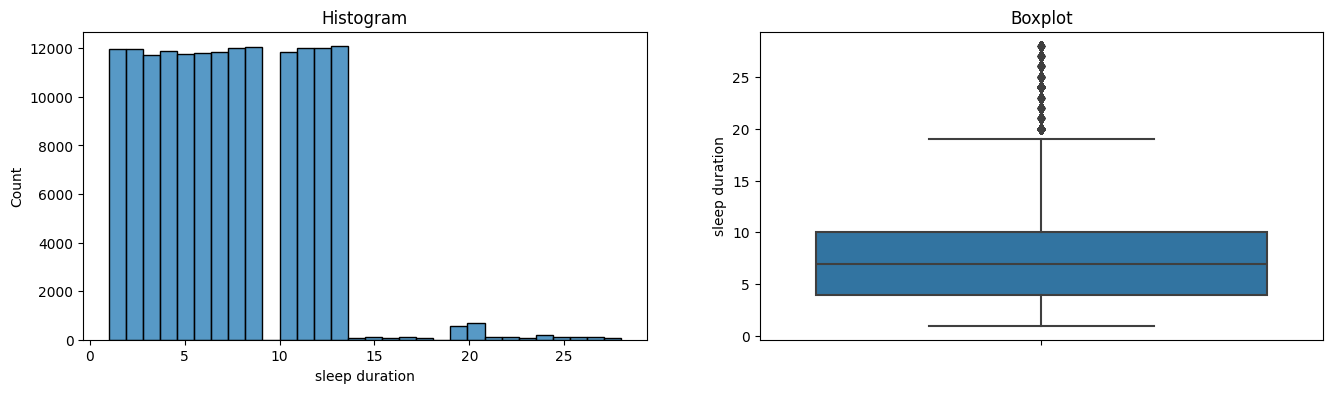

In [41]:
print('\nsleep duration - Before Trimming')
diagnostic_plots(X_train, 'sleep duration')

print('\nsleep duration - After Trimming')
diagnostic_plots(X_train_cap, 'sleep duration')

The graph shows that the outliers have been handled so that there are no outliers in the data.

In [42]:
# Display the number of rows and columns after otuliers handling
print('Size dataset - After trimming : ', y_train.shape)
print('Size dataset - After trimming  : ', X_train_cap.shape)

Size dataset - After trimming :  (157657,)
Size dataset - After trimming  :  (157657, 18)


## Feature Selection

After handling outliers, I will proceed with feature selection. I will only select/use columns that have the highest correlation with `care options`.

In [43]:
# menampilkan nama-nama kolom
X_train_cap.columns

Index(['Age', 'income', 'sleep duration', 'Gender', 'Country', 'Occupation',
       'self_employed', 'family_history', 'treatment', 'Days_Indoors',
       'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
       'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview'],
      dtype='object')

### Phik

Using Phi-K correlation because it can analyze the correlation between categorical columns and numerical columns.

In [44]:
# Concat columns
concat_train1 = pd.concat([y_train, X_train_cap],axis=1)
combinePhik = concat_train1.phik_matrix()['care_options']
combinePhik

interval columns not set, guessing: ['Age', 'income', 'sleep duration']


care_options               1.000000
Age                        0.110405
income                     0.158346
sleep duration             0.102339
Gender                     0.195362
Country                    0.447986
Occupation                 0.001986
self_employed              0.079426
family_history             0.220668
treatment                  0.458721
Days_Indoors               0.000000
Growing_Stress             0.002540
Changes_Habits             0.000000
Mental_Health_History      0.004562
Mood_Swings                0.000000
Coping_Struggles           0.000000
Work_Interest              0.000000
Social_Weakness            0.001222
mental_health_interview    0.037100
Name: care_options, dtype: float64

### Dropping columns that have no correlation or correlation below the threshold of 0.2.

In [45]:
# pick the correlation based on the matrices above
features = []
for column_name, correlation_value in combinePhik.items():
    if column_name != 'care_options' and correlation_value > 0.2:
        features.append(column_name)

features

['Country', 'family_history', 'treatment']

The columns to be used are: `Country`, `family_history`, `treatment`.

In [46]:
# put the features after correlation pick to X_train
X_train_cap = X_train_cap[features]
X_test = X_test[features]

X_train_cap

,Country,family_history,treatment
245230,United States,No,Yes
271722,United States,No,No
259473,United Kingdom,Yes,Yes
256440,United States,No,Yes
33642,Nigeria,No,No
...,...,...,...
116153,United Kingdom,No,Yes
108855,United States,No,No
103796,United Kingdom,No,No
217845,United States,Yes,Yes


In [47]:
# Displaying column names to check the result of dropping uncorrelated columns
print('X Train Columns:', X_train_cap.columns)
print('y Train Columns:', X_test.columns)

X Train Columns: Index(['Country', 'family_history', 'treatment'], dtype='object')
y Train Columns: Index(['Country', 'family_history', 'treatment'], dtype='object')


In [48]:
# Displaying the number of unique values for each column.
X_train_cap.nunique()

Country           34
family_history     2
treatment          2
dtype: int64

In [49]:
# Displaying the unique values for each column
print("Unique values in 'Country' column:\n", X_train_cap['Country'].unique())
print('')
print("Unique values in 'family_history' column:\n", X_train_cap['family_history'].unique())
print('')
print("Unique values in 'treatment' column:\n", X_train_cap['treatment'].unique())

Unique values in 'Country' column:
 ['United States' 'United Kingdom' 'Nigeria' 'Netherlands' 'Australia'
 'Georgia' 'Israel' 'Canada' 'Singapore' 'Belgium' 'Germany' 'Ireland'
 'Greece' 'Sweden' 'Switzerland' 'South Africa' 'Brazil' 'France'
 'New Zealand' 'Colombia' 'Portugal' 'Finland' 'Denmark' 'Poland' 'India'
 'Moldova' 'Czech Republic' 'Mexico' 'Philippines' 'Russia' 'Italy'
 'Croatia' 'Costa Rica' 'Thailand']

Unique values in 'family_history' column:
 ['No' 'Yes']

Unique values in 'treatment' column:
 ['Yes' 'No']


## Split between Numerical dan Categorical Column

After performing feature selection, I will split between numerical and categorical columns.

In [50]:
# split numerical dan  categorical kolom
num_col = X_train_cap.select_dtypes(include=np.number).columns.tolist()

cat_col = X_train_cap.select_dtypes(include=['object']).columns.tolist()


print(f'numerical columns: {num_col}')
print(f'categorical columns: {cat_col}')

numerical columns: []
categorical columns: ['Country', 'family_history', 'treatment']


There are only categorical columns : `Country`, `family_history`, `treatment`

In [51]:
# split train test based on column types
X_train_cat = X_train_cap[cat_col]
X_test_cat= X_test[cat_col]

# Displaying the top 4 rows of X_train_cat
X_train_cat.head(4)

,Country,family_history,treatment
245230,United States,No,Yes
271722,United States,No,No
259473,United Kingdom,Yes,Yes
256440,United States,No,Yes


In [52]:
# Displaying the top 4 rows of X_test_cat
X_test_cat.head(4)

,Country,family_history,treatment
243589,United States,Yes,No
67814,United States,Yes,Yes
12024,Ireland,No,No
15820,United States,Yes,Yes


## Cardinality check for categorical columns

After separating categorical columns, I will then group them to reduce their unique values to prevent bias.

In [53]:
# Displaying unique values
X_train_cat.nunique()

Country           34
family_history     2
treatment          2
dtype: int64

In [54]:
# Displaying the unique values from the 'Country' column
X_train_cat['Country'].unique()

array(['United States', 'United Kingdom', 'Nigeria', 'Netherlands',
       'Australia', 'Georgia', 'Israel', 'Canada', 'Singapore', 'Belgium',
       'Germany', 'Ireland', 'Greece', 'Sweden', 'Switzerland',
       'South Africa', 'Brazil', 'France', 'New Zealand', 'Colombia',
       'Portugal', 'Finland', 'Denmark', 'Poland', 'India', 'Moldova',
       'Czech Republic', 'Mexico', 'Philippines', 'Russia', 'Italy',
       'Croatia', 'Costa Rica', 'Thailand'], dtype=object)

Grouping based on continents or major regions

In [55]:
# list kosong untuk menyimpan kategori berdasarkan nama
keterangan_Country_train = []

# Loop melalui setiap nama di kolom 'Country'
for i in X_train_cat['Country']:
    if i in ['Mexico', 'United States', 'Canada', 'Brazil', 'Colombia', 'Costa Rica']:
        keterangan_Country_train.append('North and South America')
    elif i in ['Netherlands', 'Germany', 'Switzerland', 'Ireland', 'United Kingdom',
               'Sweden', 'Russia', 'Denmark', 'Bosnia and Herzegovina', 'Poland', 
               'Italy', 'Belgium', 'Croatia', 'France', 'Czech Republic', 'Georgia', 
               'Finland', 'Portugal', 'Greece']:
        keterangan_Country_train.append('Europe')
    elif i in ['Israel', 'Thailand', 'India', 'Singapore', 'Moldova', 'Philippines']:
        keterangan_Country_train.append('Asia')
    elif i in ['New Zealand', 'Australia', 'Nigeria', 'South Africa']:
        keterangan_Country_train.append('Oceania and Africa')
    else:
        keterangan_Country_train.append('Lainnya')

# Menetapkan list `keterangan_Country_train` ke kolom baru di DataFrame
X_train_cat['Country'] = keterangan_Country_train


# list kosong untuk menyimpan kategori berdasarkan nama
keterangan_Country_test = []

# Loop melalui setiap nama di kolom 'Country'
for i in X_test_cat['Country']:
    if i in ['Mexico', 'United States', 'Canada', 'Brazil', 'Colombia', 'Costa Rica']:
        keterangan_Country_test.append('North and South America')
    elif i in ['Netherlands', 'Germany', 'Switzerland', 'Ireland', 'United Kingdom',
               'Sweden', 'Russia', 'Denmark', 'Bosnia and Herzegovina', 'Poland', 
               'Italy', 'Belgium', 'Croatia', 'France', 'Czech Republic', 'Georgia', 
               'Finland', 'Portugal', 'Greece']:
        keterangan_Country_test.append('Europe')
    elif i in ['Israel', 'Thailand', 'India', 'Singapore', 'Moldova', 'Philippines']:
        keterangan_Country_test.append('Asia')
    elif i in ['New Zealand', 'Australia', 'Nigeria', 'South Africa']:
        keterangan_Country_test.append('Oceania and Africa')
    else:
        keterangan_Country_test.append('Lainnya')


# Menetapkan list `keterangan_Country_test` ke kolom baru di DataFrame
X_test_cat['Country'] = keterangan_Country_test

# Displaying new values and their value counts
X_train_cat['Country'].value_counts()

Country
North and South America    101523
Europe                      46568
Oceania and Africa           6021
Asia                         3545
Name: count, dtype: int64

In [56]:
# Displaying new values and their value counts
X_test_cat['Country'].value_counts()

Country
North and South America    33997
Europe                     15535
Oceania and Africa          1972
Asia                        1088
Name: count, dtype: int64

## Preprocess (feature encoding) dengan pipe line

After successfully separating categorical and numerical columns, now I will encode the columns with `OneHotEncoder()` because the columns are nominal. Then, they will be put into a variable named `preprocess` to undergo transformation using `ColumnTransformer()`.

In [57]:
# feature Scaling dan Encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ('cat_ordinal',encoder,cat_col)
    ],
    remainder='passthrough'
)

In [58]:
# display
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_ordinal',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Country', 'family_history', 'treatment'])])

In [59]:
# Feature Encoding - Target
le = LabelEncoder()
le.fit(y_train)

y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([1, 1, 1, ..., 0, 1, 1])

In [60]:
# Save the Class Names into a Variable
classes = le.classes_
classes

array(['No', 'Yes'], dtype=object)

# vii. Model Definition

After completing feature engineering, I will start building the model, beginning with model definition, which involves defining the model to be used.

In [61]:
# Create pipline for each model
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier())
pipe_svc = make_pipeline(preprocess, SVC())
pipe_dt = make_pipeline(preprocess, DecisionTreeClassifier(max_depth=4,random_state=35))
pipe_rf = make_pipeline(preprocess, RandomForestClassifier(max_depth=4,random_state=35))
pipe_ada = make_pipeline(preprocess, AdaBoostClassifier(random_state=35))

In [62]:
X_train_cat.shape

(157657, 3)

In [63]:
y_train_encoded.shape

(157657,)

# viii. Model Training

After defining the model, we proceed with model training. using skfold (n_splits=3) and metcis recall

In [64]:
# Define cross val for ecah pipe_model
cv_knn = cross_val_score(pipe_knn, X_train_cat, y_train_encoded, cv=3, scoring='recall', n_jobs=-1)
cv_svc = cross_val_score(pipe_svc, X_train_cat, y_train_encoded, cv=3, scoring='recall', n_jobs=-1)
cv_dt = cross_val_score(pipe_dt, X_train_cat, y_train_encoded, cv=3, scoring='recall', n_jobs=-1)
cv_rf = cross_val_score(pipe_rf, X_train_cat, y_train_encoded, cv=3, scoring='recall', n_jobs=-1)
cv_ada = cross_val_score(pipe_ada, X_train_cat, y_train_encoded, cv=3, scoring='recall', n_jobs=-1)

Using scoring `Recall` because I want to minimize false negatives.

# ix. Model Evaluation

After conducting model training, I proceed with model evaluation to determine the best model.

In [65]:
# Finding Best Model based on Cross_Val_Score (mean)
name_model = []
cv_score = 0
for cv,name in zip([cv_knn,cv_dt,cv_rf,cv_ada,cv_svc],
                   ['knn','dt','rf','ada','svc']):
    print(name)
    print('recall score - All - Cross Validation', cv)
    print('recall score - mean - Cross Validation', cv.mean())
    print('recall score - std - Cross Validation', cv.std())
    print('recall score - range - Cross Validation', (cv.mean()-cv.std()), '-', (cv.mean() + cv.std()))
    print('-'*50)
    if cv.mean() > cv_score:
        cv_score = cv.mean()
        name_model = name
    else:
        pass

print('Best Model:', name_model)
print('Cross Val Mean from Best Model:', cv_score)

knn
recall score - All - Cross Validation [0.99618045 0.91821577 0.86838978]
recall score - mean - Cross Validation 0.9275953345718756
recall score - std - Cross Validation 0.05259021541376303
recall score - range - Cross Validation 0.8750051191581125 - 0.9801855499856387
--------------------------------------------------
dt
recall score - All - Cross Validation [0.59741968 0.59918513 0.60419319]
recall score - mean - Cross Validation 0.6002660014757746
recall score - std - Cross Validation 0.0028689511170914062
recall score - range - Cross Validation 0.5973970503586832 - 0.603134952592866
--------------------------------------------------
rf
recall score - All - Cross Validation [0.59741968 0.59918513 0.60419319]
recall score - mean - Cross Validation 0.6002660014757746
recall score - std - Cross Validation 0.0028689511170914062
recall score - range - Cross Validation 0.5973970503586832 - 0.603134952592866
--------------------------------------------------
ada
recall score - All - Cro

After completing model evaluation, I found out that the best model is `knn` and Cross Val Mean from Best Model: `0.9275953345718756`

## Predicting train and test sets using `knn`

In [66]:
# Training using K-Nearest Neighbor
pipe_knn.fit(X_train_cat, y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_ordinal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'family_history',
                                                   'treatment'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

K-Nearest Neighbor - Confusion Matrix Train Set

K-Nearest Neighbor - Confusion Matrix Test Set



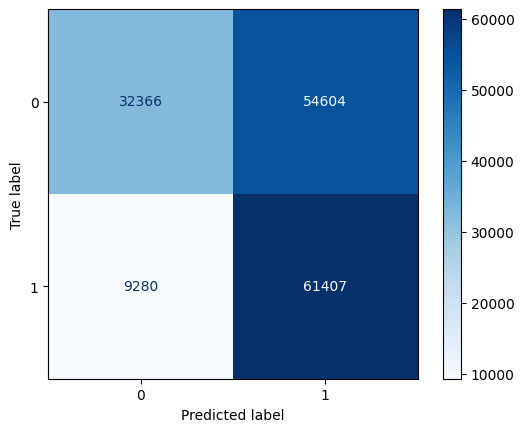

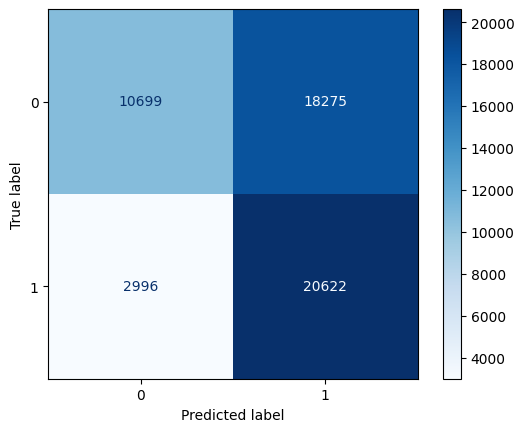

In [67]:
# Check Performance Model against Train-Set

y_pred_train = pipe_knn.predict(X_train_cat)
y_pred_test = pipe_knn.predict(X_test_cat)

print('K-Nearest Neighbor - Confusion Matrix Train Set')
ConfusionMatrixDisplay.from_estimator(pipe_knn, X_train_cat, y_train_encoded, cmap='Blues')
print('')

print('K-Nearest Neighbor - Confusion Matrix Test Set')
ConfusionMatrixDisplay.from_estimator(pipe_knn, X_test_cat, y_test_encoded, cmap='Blues')
print('')

In [68]:
# Save Classification Report into a Dictionary

all_reports = {}
# Save Classification Report into a Dictionary

def performance_report(all_reports, y_train_encoded, y_pred_train, y_test_encoded, y_pred_test, name):
    # Calculate recall scores
    train_recall = recall_score(y_train_encoded, y_pred_train)
    test_recall = recall_score(y_test_encoded, y_pred_test)
    
    # Compute confusion matrices to extract False Negatives
    cm_train = confusion_matrix(y_train_encoded, y_pred_train)
    cm_test = confusion_matrix(y_test_encoded, y_pred_test)
    
    # Extract False Negatives
    fn_train = cm_train[1, 0]
    fn_test = cm_test[1, 0]

    # Create dictionary for the report
    score_reports = {
        'train - recall_score' : train_recall,
        'test - recall_score' : test_recall,
        'train - false_negatives' : fn_train,
        'test - false_negatives' : fn_test
    }

    # Add report to the dictionary
    all_reports[name] = score_reports
    return all_reports

# Assuming all_reports, y_train_encoded, y_pred_train, y_test_encoded, y_pred_test are defined
# Call the function to update the report
all_reports = performance_report(all_reports, y_train_encoded, y_pred_train, y_test_encoded, y_pred_test, 'Baseline (Default Hyperparameter)')

# Convert the dictionary to a DataFrame
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
train - recall_score,0.868717
test - recall_score,0.873148
train - false_negatives,9280.000000
test - false_negatives,2996.000000


The recall score on the training data using KNN is 0.86, and the recall score on the test data is 0.83. `Test > train` and `train > 80%` indicate a good fit. Although it's already a **`good fit`**, I will still proceed with hyperparameter tuning.

The number of false negatives in the training set is higher, at `9280`, compared to the test set, which has `2996` false negatives.

## Hyperparameter Tuning

Next, I'll perform hyperparameter tuning to find the optimal combination aimed at enhancing the model's performance. I'll utried it with a randomforestclassifier to know which features the algorithm is giving more impact, although it doesn't guarantee finding the optimal solution, it's often more efficient than grid search.

In [69]:
# Define a smaller hyperparameter random search

param_dist = {
    'kneighborsclassifier__n_neighbors' : [1,3,5,7,9,11],
    'kneighborsclassifier__weights' : ['uniform', 'distance'], 
    'kneighborsclassifier__metric': ['euclidean', 'manhattan']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(pipe_knn, param_distributions=param_dist, n_iter=50, cv=5, scoring='recall', random_state=30, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_cat, y_train_encoded)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'kneighborsclassifier__weights': 'uniform', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__metric': 'euclidean'}


Best Hyperparameters:  
- kneighborsclassifier__weights: uniform   
- kneighborsclassifier__n_neighbors: 3   
- kneighborsclassifier__metric: euclidean

In [70]:
# Get the best hyperparameters
bestParams = random_search.best_estimator_

# Call the set variable
bestParams

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_ordinal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'family_history',
                                                   'treatment'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=3))])

Confusion Matrix Train Set: 
Confusion Matrix Test Set: 


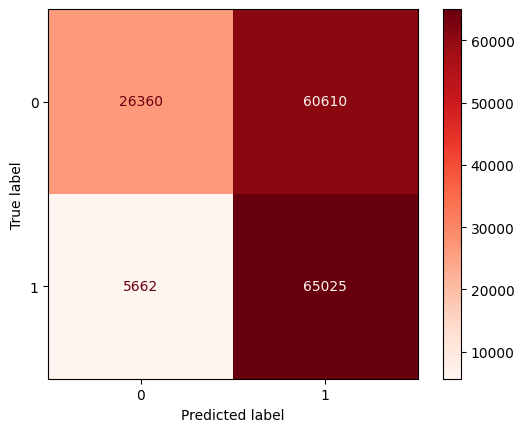

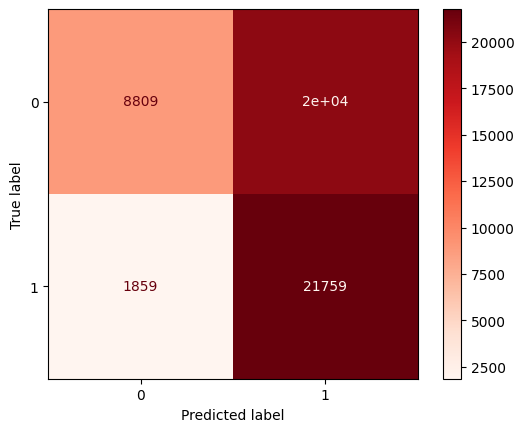

In [71]:
# Using the best model from GridSearchCV
best_knn = random_search.best_estimator_

# Predicting classes for training and test data
y_train_pred_tuned = best_knn.predict(X_train_cat)
y_test_pred_tuned = best_knn.predict(X_test_cat)

# Calculating recall scores for training and test data
recall_train = recall_score(y_train_encoded, y_train_pred_tuned)
recall_test = recall_score(y_test_encoded, y_test_pred_tuned)

# Displaying confusion matrix recall
print('Confusion Matrix Train Set: \n', ConfusionMatrixDisplay.from_estimator(best_knn, X_train_cat, y_train_encoded, cmap='Reds'))
print('Confusion Matrix Test Set: \n', ConfusionMatrixDisplay.from_estimator(best_knn, X_test_cat, y_test_encoded, cmap='Reds'))

In [72]:
# Displaying recall scores before and after tuning
all_reports = performance_report(all_reports, y_train_encoded, y_train_pred_tuned, y_test_encoded, y_test_pred_tuned, 'Random Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Random Search
train - recall_score,0.868717,0.919900
test - recall_score,0.873148,0.921289
train - false_negatives,9280.000000,5662.000000
test - false_negatives,2996.000000,1859.000000


The recall score after tuning is better than before tuning. After tuning, the recall score on both the training and test data increased and became very good fit, reaching `90%`, which is higher than 80%. Additionally, the difference between the train and test scores is not significant.

The number of false negatives decreased after hyperparameter tuning. Although there are still quite a few false negatives, considering the large amount of data, it is very reasonable.

# x. Model Saving

After completing model training and evaluation, the next step is to save the model for future use.

In [73]:
with open('best_model.pkl','wb') as file_1: # wb = write binary
    pickle.dump(best_knn,file_1)

# xi. Model Inference

Goal: To keep the data confidential.  
Saved in a different notebook.

# xii. Kesimpulan

> From the data, the following insights can be provided:

1. **Awareness**: There's a significant need to raise awareness about mental health issues. Despite some respondents recognizing the importance of mental care, a considerable percentage still don't seek help. Boosting public awareness, reducing mental health stigma, and promoting access to care are crucial steps.

2. **Access to Care**: Enhancing access to mental health services is vital. While many in need access care, a significant portion doesn't, possibly due to factors like cost or stigma. Improving accessibility through support programs, online services, or community facilities is essential.

3. **Further Research**: While the data provides insights, further research is needed to understand underlying factors and develop effective interventions for various demographic groups.

4. **Social Support**: Social support plays a significant role in reducing stress and improving mental well-being. Encouraging the development of support networks through family, friends, or community can be pivotal.

5. **Education and Coping Skills**: Education and training programs can teach healthy coping strategies for daily stressors. Promoting these skills can empower individuals to better manage their mental health.

Implementing these steps can enhance overall mental health and mitigate the negative impacts of mental disorders.

> Advantages of the model:
- KNN can handle imbalanced data well because it doesn't rely on the class distribution in the data.
- The concept of KNN is relatively simple and easy to understand.

> Disadvantages of the model:
- KNN requires computing the distance between every pair of data points in the training set. This can be computationally expensive, especially if the number of data points or dimensions is very large.
- KNN requires storing the entire training set in memory. For large datasets, this can be a memory usage issue.

> Metrics:
- `recall`: the ratio of the number of true positive predictions to the total number of actual positive data, used when aiming to minimize False Negatives as low as possible.

- The recall score after tuning is better than before tuning. After tuning, the recall score on both the training and test data increased and became a `very good fit`, reaching `90%`, which is higher than 80%. Additionally, the difference between the train and test scores is not significant.

> For model improvement:
- The model is already good, so the improvement can be minimal.
- Trying out more models and parameters.
- Trying to find the best parameters with grid search (the result may vary).
- Using ensemble techniques like Bagging or Boosting with KNN can reduce variance and improve the generalization of the model.

# Conceptual Problems

1. **Background and How Bagging Works**:
   - **Background**: Bagging, short for Bootstrap AGGregating, combines bootstrapping and aggregation to create an ensemble model. It addresses variance and overfitting by training multiple models on different subsets of the data and then averaging their predictions.
   - **How it Works**: Bagging creates several bootstrap samples from the training data, and each model in the ensemble is trained on one of these samples. During the prediction, the final result is obtained by combining the predictions of all models, usually by averaging or voting. This process reduces variance, increases stability, and often leads to better generalization.

2. **Difference Between Random Forest and Boosting Algorithms**:
   - **Random Forest**: It's an ensemble method that uses bagging and decision trees. Multiple decision trees are trained independently on random subsets of features and observations, and their predictions are combined.
   - **Boosting Algorithms**: These methods train base learners sequentially, and each subsequent learner focusing more to instances misclassified by previous ones. Boosting adjusts the weights of training instances based on previous learners' performance, unlike Random Forest where trees are trained independently.

3. **Explanation of Cross Validation**:
   - **Cross Validation**: it is a technique that used to evaluate a model's performance and generalization ability. The dataset is divided into subsets, and the model is trained on one subset and evaluated on the others. This process is repeated several times, and performance metrics from each fold are averaged to provide a robust estimate. Cross Validation helps to detect overfitting and provides an accurate assessment of how well the model will generalize to unseen data.